In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
def extract_tensorboard_scalars(log_file, scalar_keys):
    # Initialize an EventAccumulator with the path to the log directory
    event_acc = EventAccumulator(log_file)
    event_acc.Reload()  # Load the events from disk

    if isinstance(scalar_keys, str):
        scalar_keys = [scalar_keys]

    # Extract the scalar summaries
    scalars = {}
    for tag in scalar_keys:
        scalars_for_tag = event_acc.Scalars(tag)
        scalars[tag] = {
            'step': [s.step for s in scalars_for_tag],
            'wall_time': [s.wall_time for s in scalars_for_tag],
            'value': [s.value for s in scalars_for_tag],
        }

    return scalars

In [2]:
ask_return = extract_tensorboard_scalars("../rl-starter-files/storage/GoToImpUnlock0.0005Ask", "return_mean")['return_mean']
base_return = extract_tensorboard_scalars("../rl-starter-files/storage/GoToImpUnlockNoGPT", "return_mean")['return_mean']

In [11]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

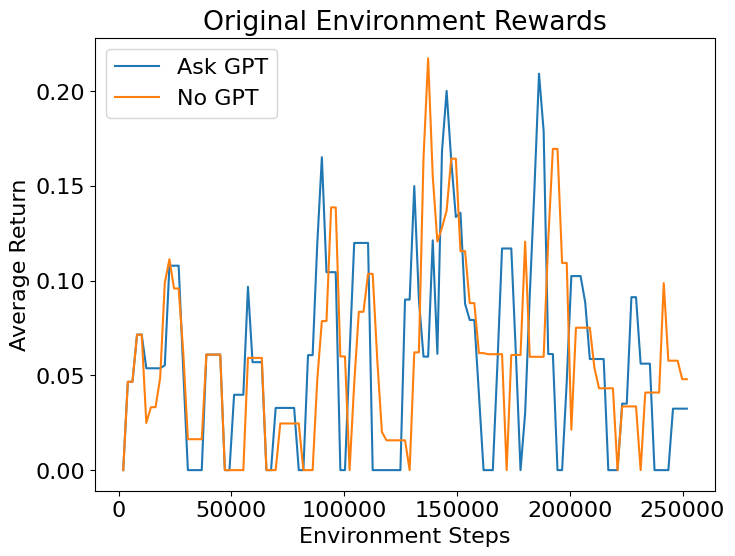

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(ask_return['step'], ask_return['value'], label="Ask GPT")
plt.plot(base_return['step'], base_return['value'], label="No GPT")
plt.legend()
plt.xlabel("Environment Steps")
plt.ylabel("Average Return")
plt.title("Original Environment Rewards")
plt.savefig("fig1.1.jpg")
plt.show()

In [13]:
ask_rreturn = extract_tensorboard_scalars("../rl-starter-files/storage/GoToImpUnlock0.0005Ask", "rreturn_mean")['rreturn_mean']
base_rreturn = extract_tensorboard_scalars("../rl-starter-files/storage/GoToImpUnlockNoGPT", "rreturn_mean")['rreturn_mean']

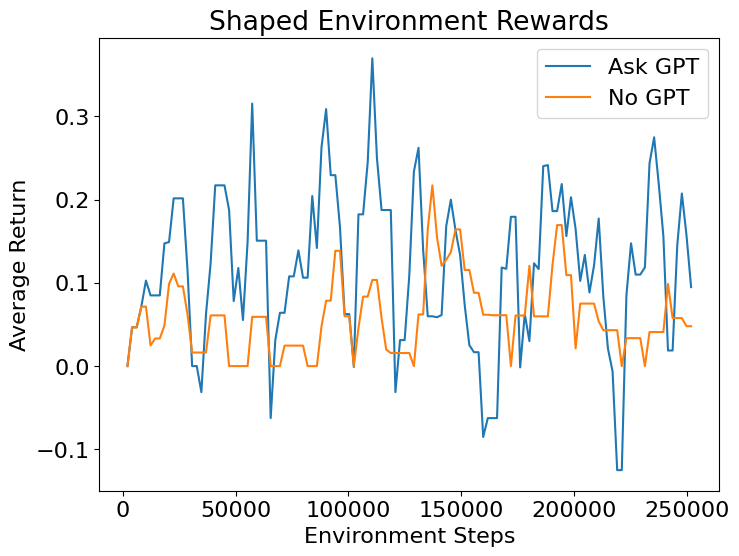

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(ask_rreturn['step'], ask_rreturn['value'], label="Ask GPT")
plt.plot(base_rreturn['step'], base_rreturn['value'], label="No GPT")
plt.legend()
plt.xlabel("Environment Steps")
plt.ylabel("Average Return")
plt.title("Shaped Environment Rewards")
plt.savefig("fig1.2.jpg")
plt.show()